In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('cleaned_data.csv') 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head(5)

,NewID,Category,Title,Abstract
0,N88753,lifestyle,brands queen elizabeth prince charles prince p...,shop notebooks jacket royal ca nt live without
1,N45436,news,walmart slash price lastgeneration ipad,apple new ipad release bring big deal last yea...
2,N23144,health,bad habit belly fat,seemingly harmless habit hold back keep shed u...
3,N93187,news,cost trumps aid freeze trench ukraines war,lt ivan molchanet peek parapet sand bag front ...
4,N75236,health,nba wife here affect mental health,feel like fraud nba wife did nt help fact near...


In [4]:
test_df = pd.read_csv('test.csv')
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
test_df.head(5)

,NewID,Category,Title,Abstract
0,N87253,sports,Cam Heyward named NFLPA Community MVP of the Week,Cameron Heyward receives a great off field hon...
1,N96113,news,More Galaxy S11 versions will support 5G conne...,"The Galaxy S11's design has been finished, a l..."
2,N117651,sports,Panthers mailbag: Cam Newton's future in Carol...,"Oh, the takes. So, so many takes. The Carolina..."
3,N66784,sports,Notre Dame Stadium will not be sold out for fi...,Not since Thanksgiving Day 1973 had Notre Dame...
4,N80122,sports,4 key things to know about Chargers vs. Chiefs,NaN


### Combining the feature columns Title and Abstract in training data

In [6]:
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")
df.dropna(subset = ["News"], inplace=True)

print('Length of the training dataset ', len(df))
df.head()

Length of the training dataset  77077


,NewID,Category,Title,Abstract,News
0,N88753,lifestyle,brands queen elizabeth prince charles prince p...,shop notebooks jacket royal ca nt live without,brands queen elizabeth prince charles prince p...
1,N45436,news,walmart slash price lastgeneration ipad,apple new ipad release bring big deal last yea...,walmart slash price lastgeneration ipad apple ...
2,N23144,health,bad habit belly fat,seemingly harmless habit hold back keep shed u...,bad habit belly fat seemingly harmless habit ...
3,N93187,news,cost trumps aid freeze trench ukraines war,lt ivan molchanet peek parapet sand bag front ...,cost trumps aid freeze trench ukraines war lt ...
4,N75236,health,nba wife here affect mental health,feel like fraud nba wife did nt help fact near...,nba wife here affect mental health feel like f...


### Combining the feature columns Title and Abstract in test data

In [7]:
test_df['News'] = test_df['Title'].str.cat(test_df['Abstract'],sep=" ")
test_df.dropna(subset = ["News"], inplace=True)

### Applying Bag of Words and TF-IDF on the training data

In [8]:
x_title_abstract_train, y_title_abstract_train = df.News.values, df.Category.values

# Vectorizing the text values using CountVectorizer
count_vectorizer = CountVectorizer() 
TA_CVec = count_vectorizer.fit_transform(x_title_abstract_train)

# Applying tf-idf to the news column using TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(TA_CVec)

### Applying Bag of Words and TF-IDF on the test data

In [9]:
feature_test_news, label_test_news = test_df.News.values, test_df.Category.values
Feature_test_news = count_vectorizer.transform(feature_test_news)
Feature_test_news_cleaned = tfidf_transformer.fit_transform(Feature_test_news)

### Performing hyperparameter tuning using cross-validation 

In [10]:
# Defining the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [11]:
model_news = svm.LinearSVC()

In [12]:
# Initializing GridSearchCV
grid_search = GridSearchCV(model_news, param_grid, cv=5, scoring='accuracy')

# Fitting the grid search to the training data
grid_search.fit(X_train_tfidf, y_title_abstract_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_model = grid_search.best_estimator_

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/s

### Evaluating model on the test data

In [13]:
predicted_test_tuned = best_model.predict(Feature_test_news_cleaned)

### Evaluating model accuracy

In [14]:
# Evaluate accuracy on the test data
accuracy_test_tuned = accuracy_score(label_test_news, predicted_test_tuned)
print("Accuracy on Test Data with Tuned Hyperparameters:", accuracy_test_tuned)

Accuracy on Test Data with Tuned Hyperparameters: 0.7245949926362297


### Classification Report

In [15]:
print(classification_report(label_test_news, predicted_test_tuned))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
               precision    recall  f1-score   support

        autos       0.57      0.56      0.56       436
entertainment       0.54      0.40      0.46       111
      finance       0.52      0.53      0.53      1064
 foodanddrink       0.68      0.70      0.69       731
       health       0.59      0.53      0.56       417
         kids    

### Confusion Matrix

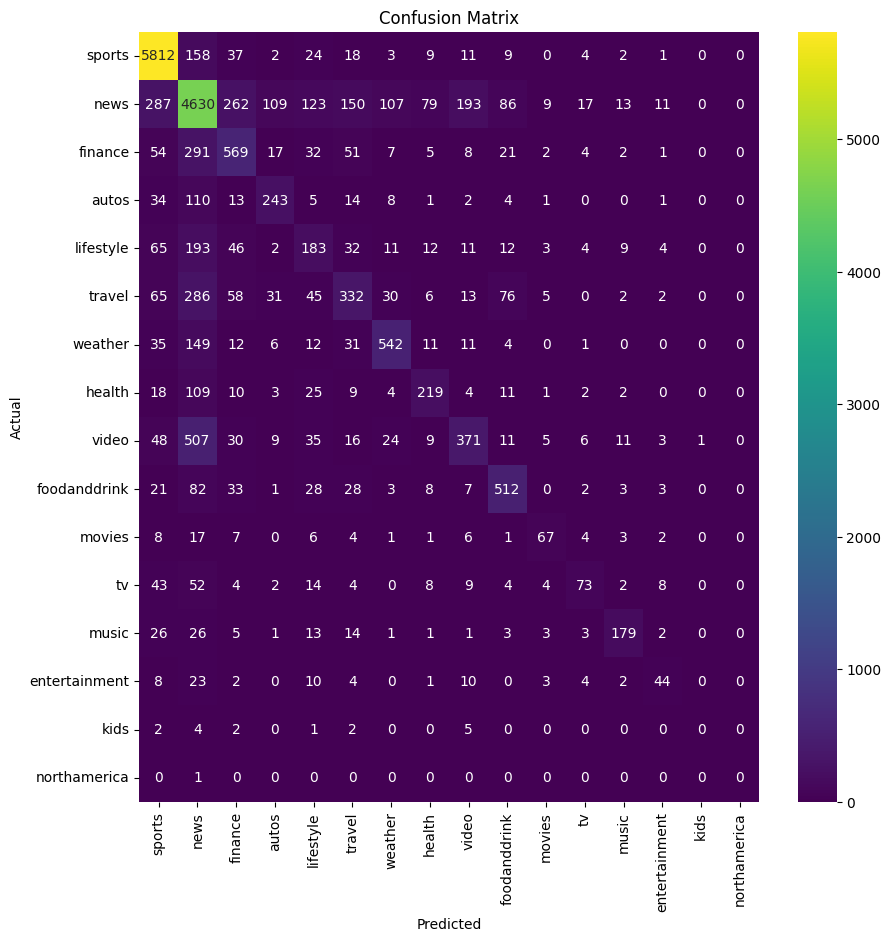

In [18]:
label = ['sports', 'news', 'finance', 'autos', 'lifestyle', 'travel', 'weather', 'health',
 'video', 'foodanddrink', 'movies', 'tv', 'music', 'entertainment', 'kids',
 'northamerica']
c_m = confusion_matrix(label_test_news, predicted_test_tuned, labels = label)

#Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(c_m, label, label), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c41a900-ec3b-423b-ace8-d13b9a16907d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>